# Alpha/Beta rating of User Stock Compared to Sector Stock
    - Calculates the Alpha and Beta rating of the stock using the comparison stock as the index/etf of the sector the user stock is in 

In [3]:
stock1 = widgets.Text() #used to get the user input for the ticker symbol
stock2 = widgets.Text()
stock3 = widgets.Text()
box = widgets.VBox([stock1,stock2,stock3])
box

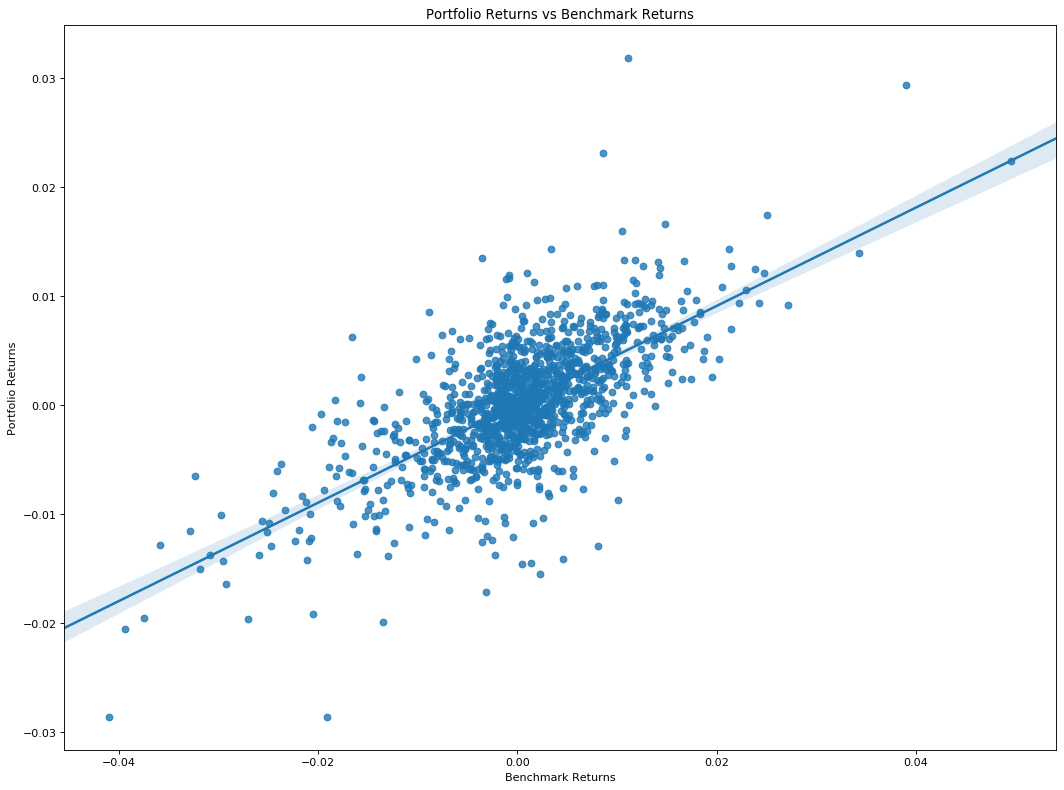

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as web
from scipy import stats
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import ipywidgets as widgets
import pandas_datareader
import datetime
import pandas_datareader.data as web
import yfinance as yf

from matplotlib.pyplot import figure
figure(num=None, figsize=(16, 12), dpi=80, facecolor='w', edgecolor='k')

tickers = [stock1.value,stock2.value,stock3.value]
wts = [0.2,0.2,0.2]

price_data = web.get_data_yahoo(tickers,
                               start = '2015-01-01',
                               end = '2020-02-08')
price_data = price_data['Adj Close']

ret_data = price_data.pct_change()[1:]

port_ret = (ret_data * wts).sum(axis = 1)

benchmark_price = web.get_data_yahoo("^GSPC",
                               start = '2015-01-01',
                               end = '2020-02-08')
                               
benchmark_ret = benchmark_price["Adj Close"].pct_change()[1:]

sns.regplot(benchmark_ret.values,
port_ret.values)
plt.xlabel("Benchmark Returns")
plt.ylabel("Portfolio Returns")
plt.title("Portfolio Returns vs Benchmark Returns")

plt.show()

In [6]:
(beta, alpha) = stats.linregress(benchmark_ret.values,
                port_ret.values)[0:2]
                
print("The portfolio beta is", round(beta, 4)*100 ,"%")

print("The portfolio alpha is", round(alpha,5)*100 ,"%")


The portfolio beta is 45.07 %
The portfolio alpha is 0.008 %


In [7]:
test = widgets.Text()
test

Text(value='')

In [15]:
#Graphing candlestick chart for the stock that the user input and a fund for the sector of the stock that the user input
from mpl_finance import candlestick_ohlc
from matplotlib.dates import DateFormatter, date2num, WeekdayLocator, DateLocator, MONDAY


import pandas as pd
import pandas_datareader as web
from bokeh.plotting import figure, show, output_file

user_stock = web.get_data_yahoo(test.value,start = "2019-03-01", end = "2020-02-08")

user_stock['date'] = pd.to_datetime(user_stock.index)
# This is to color the red and green bars for Down and up days
increase = user_stock['Close'] > user_stock["Open"]
decrease = user_stock['Open'] > user_stock["Close"]
# w is used to specify the width of each bar
w = 12*60*60*1000
# Tools we want on our chart such as zoom, save etc
tools = "pan,box_zoom,reset,save"
# p is our figure or plot
p = figure(x_axis_type = "datetime", tools = tools, plot_width = 1000, title = test.value + " CandleStick Chart")
# Shows the grid line traperency
p.grid.grid_line_alpha=0.3
# Adding Vertical lines on the cheart each day
p.segment(user_stock.date, user_stock.High, user_stock.date, user_stock.Low, color="black")
# Adding the bars on each line and specifying the width as w
# Coloring up days as Green
p.vbar(user_stock.date[increase], w, user_stock.Open[increase], user_stock.Close[increase], fill_color="#D5E1DD", line_color="black")
# Coloring down days as Red
p.vbar(user_stock.date[decrease], w, user_stock.Open[decrease], user_stock.Close[decrease], fill_color="#F2583E", line_color="black")
# Saving the file as candlestick.html
output_file("candlestick.html", title="candlestick.py example")
show(p) 

In [ ]:
# REPLACE WITH SECTOR instead of "input.value"
from mpl_finance import candlestick_ohlc
from matplotlib.dates import DateFormatter, date2num, WeekdayLocator, DateLocator, MONDAY


import pandas as pd
import pandas_datareader as web
from bokeh.plotting import figure, show, output_file

user_stock = web.get_data_yahoo(test.value,start = "2019-03-01", end = "2020-02-08")

user_stock['date'] = pd.to_datetime(user_stock.index)
# This is to color the red and green bars for Down and up days
increase = user_stock['Close'] > user_stock["Open"]
decrease = user_stock['Open'] > user_stock["Close"]
# w is used to specify the width of each bar
w = 12*60*60*1000
# Tools we want on our chart such as zoom, save etc
tools = "pan,box_zoom,reset,save"
# p is our figure or plot
p = figure(x_axis_type = "datetime", tools = tools, plot_width = 1000, title = test.value + " CandleStick Chart")
# Shows the grid line traperency
p.grid.grid_line_alpha=0.3
# Adding Vertical lines on the cheart each day
p.segment(user_stock.date, user_stock.High, user_stock.date, user_stock.Low, color="black")
# Adding the bars on each line and specifying the width as w
# Coloring up days as Green
p.vbar(user_stock.date[increase], w, user_stock.Open[increase], user_stock.Close[increase], fill_color="#D5E1DD", line_color="black")
# Coloring down days as Red
p.vbar(user_stock.date[decrease], w, user_stock.Open[decrease], user_stock.Close[decrease], fill_color="#F2583E", line_color="black")
# Saving the file as candlestick.html
output_file("candlestick.html", title="candlestick.py example")
show(p) 

# Enter Name Of Company
    - Ex: TSLA would be Tesla

In [10]:
stock = widgets.Text()
stock

Text(value='')

# Sentiment Analysis
    - Gets news headlines for stock that the user inputted using NEWSAPI
    - Feeds the news headlines into monkeylearn to analyze for sentiment analysis
    - Determines a correlation between snetimentn analysis and stock price

In [20]:
from newsapi import NewsApiClient
import json

# Init
newsapi = NewsApiClient(api_key='90ea3a917ab743ef925def71bb5b5c30')

# /v2/top-headlines
top_headlines = newsapi.get_top_headlines(q=stock.value,
#                                           sources='bbc-news,the-verge',
                                          category='business',
                                          language='en',
                                          country='us')

# /v2/everything
all_articles = newsapi.get_everything(q=stock.value,
                                      sources='bbc-news,the-verge',
                                      domains='bbc.co.uk,techcrunch.com',
                                      from_param='2020-01-10',
                                      to='2020-02-03',
                                      language='en',
                                      sort_by='relevancy',
                                      page=2)

# /v2/sources
sources = newsapi.get_sources()

In [21]:
x = len(all_articles['articles'])
cnt = 0


all_top_headlines = ""
# while(cnt < x):
#     all_top_headlines += top_headlines['articles'][cnt]['title']
#     cnt = cnt + 1

while(cnt < x):
    all_top_headlines += all_articles['articles'][cnt]['title']
    cnt = cnt + 1
    
import requests

# data = {
#   'text': top_headlines['articles'][0]['title']
# }


all_top_headlines

''

In [13]:
#maybe usemonkeyLearn

from textblob import TextBlob

# text = all_top_headlines
text = all_top_headlines

blob = TextBlob(text)
blob.tags           # [('The', 'DT'), ('titular', 'JJ'),
                    #  ('threat', 'NN'), ('of', 'IN'), ...]

blob.noun_phrases   # WordList(['titular threat', 'blob',
                    #            'ultimate movie monster',
                    #            'amoeba-like mass', ...])

for sentence in blob.sentences:
    print(sentence.sentiment)
    print(sentence.analyzer) #fix this

# print(help(sentence))

Sentiment(polarity=-0.018518518518518556, subjectivity=0.462962962962963)
Sentiment(polarity=0.06666666666666667, subjectivity=0.7666666666666666)


In [14]:
from monkeylearn import MonkeyLearn
 
ml = MonkeyLearn('990d0e6ae6b3a3be92701c33abb34b222cf32e27')
# data = [top_headlines['articles'][0]['title'],top_headlines['articles'][1]['title']] #maybe use allheadlines
data = [all_top_headlines]
model_id = 'cl_pi3C7JiL'
result = ml.classifiers.classify(model_id, data)

print(result.body)

[{'text': 'Coronavirus: Thousands stuck on cruise ship after suspected caseTesla is now selling a t-shirt commemorating Cybertruck shattered window flubElon Musk just dropped an EDM track on SoundCloudTesla market value passes Volkswagen to hit $100bnTesla closes Shanghai factory over coronavirus concernsTesla’s record 2019 has bought it some breathing roomTesla strikes deal to sell cars in MichiganPlug-in and sail: Meet the electric ferry pioneersCoronavirus: Facebook staff told to avoid China travelWatch SpaceX launch 60 more Starlink broadband satellites liveTesla says faulty acceleration allegation is ‘completely false’Tesla says it will start delivering the Model Y this spring, months ahead of scheduleTesla says China has ordered its Shanghai factory shut down over coronavirus fearsThis Cybertruck-inspired iPhone 11 Pro costs $15K and isn’t made by Tesla or AppleApple’s App Store still limits developers’ options for how to make moneyUber temporarily suspends 240 accounts in Mexico